In [2]:
import torch
import profiler
from matplotlib import pyplot as plt
from tqdm import tqdm

profiler.init()

Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


Number of blocks: 1700
Model creation time: 3.81 seconds
[fake_prefill] Initializing base KV entries


16it [00:31,  1.98s/it]


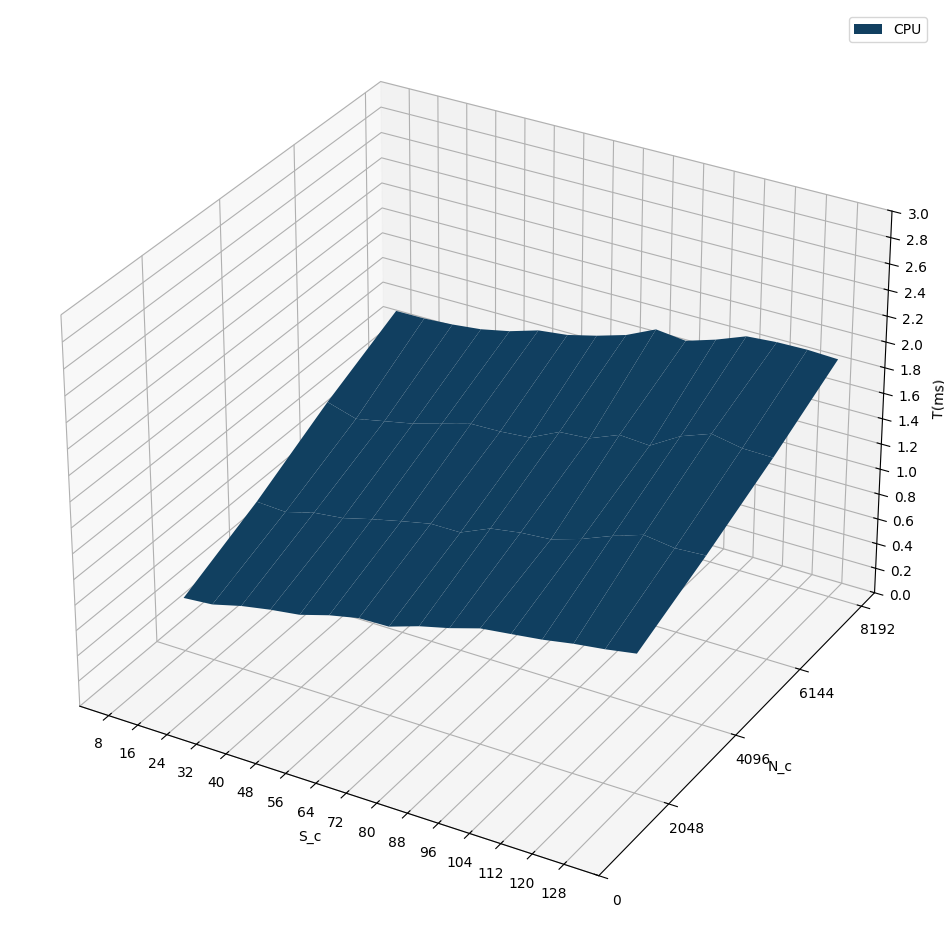

In [14]:
import numpy as np

def get_decode_attn_perf_model():
  LS = 17
  LN = 5
  S_list = [i * 8 for i in range(1, LS)]
  N_list = [2048 * i for i in range(1, LN)]

  T_array = np.zeros((len(S_list), len(N_list)), dtype=np.float32)
  for i, S in tqdm(enumerate(S_list)):
    for j, N in enumerate(N_list):
      # Create an list with N entries and the sum of the list is W
      cpu_decode_lens = [N // S] * (S - N % S) + [N // S + 1] * (N % S)
      # print(cpu_decode_lens)
      res = profiler.run_test_case(
        cpu_decode_lens=cpu_decode_lens
      )
      T_array[i, j] = res.avg_cpu_attn_time

  ax = plt.axes(projection='3d')
  ax.plot_surface(
    np.outer(S_list, np.ones(len(N_list))),
    np.outer(np.ones(len(S_list)), N_list),
    T_array,
    label = "CPU"
  )

  ax.set_xlim(0)
  ax.set_ylim(0)
  ax.set_xticks(S_list)
  ax.set_yticks([0] + N_list)
  ax.set_zticks([0.2 * i for i in range(0, 16)])
  ax.set_xlabel("S_c")
  ax.set_ylabel("N_c")
  ax.set_zlabel("T(ms)")


plt.figure(figsize=(16, 12))
get_decode_attn_perf_model()

plt.grid()
plt.legend()

  0%|          | 0/32 [00:00<?, ?it/s]

  3%|▎         | 1/32 [00:00<00:07,  3.99it/s]

Time taken: 37.28 ms


  6%|▋         | 2/32 [00:00<00:06,  4.50it/s]

Time taken: 39.12 ms


  9%|▉         | 3/32 [00:00<00:06,  4.67it/s]

Time taken: 40.65 ms


 12%|█▎        | 4/32 [00:00<00:05,  4.73it/s]

Time taken: 41.17 ms


 16%|█▌        | 5/32 [00:01<00:06,  4.15it/s]

Time taken: 54.45 ms


 19%|█▉        | 6/32 [00:01<00:06,  3.75it/s]

Time taken: 63.02 ms


 22%|██▏       | 7/32 [00:01<00:07,  3.35it/s]

Time taken: 72.77 ms


 25%|██▌       | 8/32 [00:02<00:07,  3.12it/s]

Time taken: 73.31 ms


 28%|██▊       | 9/32 [00:02<00:08,  2.62it/s]

Time taken: 102.92 ms


 31%|███▏      | 10/32 [00:03<00:09,  2.35it/s]

Time taken: 104.91 ms


 34%|███▍      | 11/32 [00:03<00:09,  2.18it/s]

Time taken: 105.95 ms


 38%|███▊      | 12/32 [00:04<00:09,  2.08it/s]

Time taken: 106.63 ms


 41%|████      | 13/32 [00:04<00:10,  1.87it/s]

Time taken: 131.95 ms


 44%|████▍     | 14/32 [00:05<00:10,  1.74it/s]

Time taken: 132.60 ms


 47%|████▋     | 15/32 [00:06<00:10,  1.66it/s]

Time taken: 133.51 ms


 50%|█████     | 16/32 [00:06<00:09,  1.60it/s]

Time taken: 134.63 ms


 53%|█████▎    | 17/32 [00:07<00:09,  1.50it/s]

Time taken: 151.51 ms


 56%|█████▋    | 18/32 [00:08<00:09,  1.44it/s]

Time taken: 152.31 ms


 59%|█████▉    | 19/32 [00:09<00:09,  1.39it/s]

Time taken: 155.03 ms


 62%|██████▎   | 20/32 [00:10<00:09,  1.31it/s]

Time taken: 173.53 ms


 66%|██████▌   | 21/32 [00:11<00:08,  1.23it/s]

Time taken: 186.02 ms


 69%|██████▉   | 22/32 [00:12<00:08,  1.18it/s]

Time taken: 186.97 ms


 72%|███████▏  | 23/32 [00:12<00:07,  1.14it/s]

Time taken: 188.12 ms


 75%|███████▌  | 24/32 [00:13<00:07,  1.11it/s]

Time taken: 188.63 ms


 78%|███████▊  | 25/32 [00:14<00:06,  1.08it/s]

Time taken: 196.35 ms


 81%|████████▏ | 26/32 [00:15<00:05,  1.03it/s]

Time taken: 215.74 ms


 84%|████████▍ | 27/32 [00:17<00:05,  1.00s/it]

Time taken: 216.48 ms


 88%|████████▊ | 28/32 [00:18<00:04,  1.03s/it]

Time taken: 219.87 ms


 91%|█████████ | 29/32 [00:19<00:03,  1.06s/it]

Time taken: 227.40 ms


 94%|█████████▍| 30/32 [00:20<00:02,  1.09s/it]

Time taken: 228.18 ms


 97%|█████████▋| 31/32 [00:21<00:01,  1.15s/it]

Time taken: 260.67 ms


100%|██████████| 32/32 [00:23<00:00,  1.39it/s]

Time taken: 261.43 ms


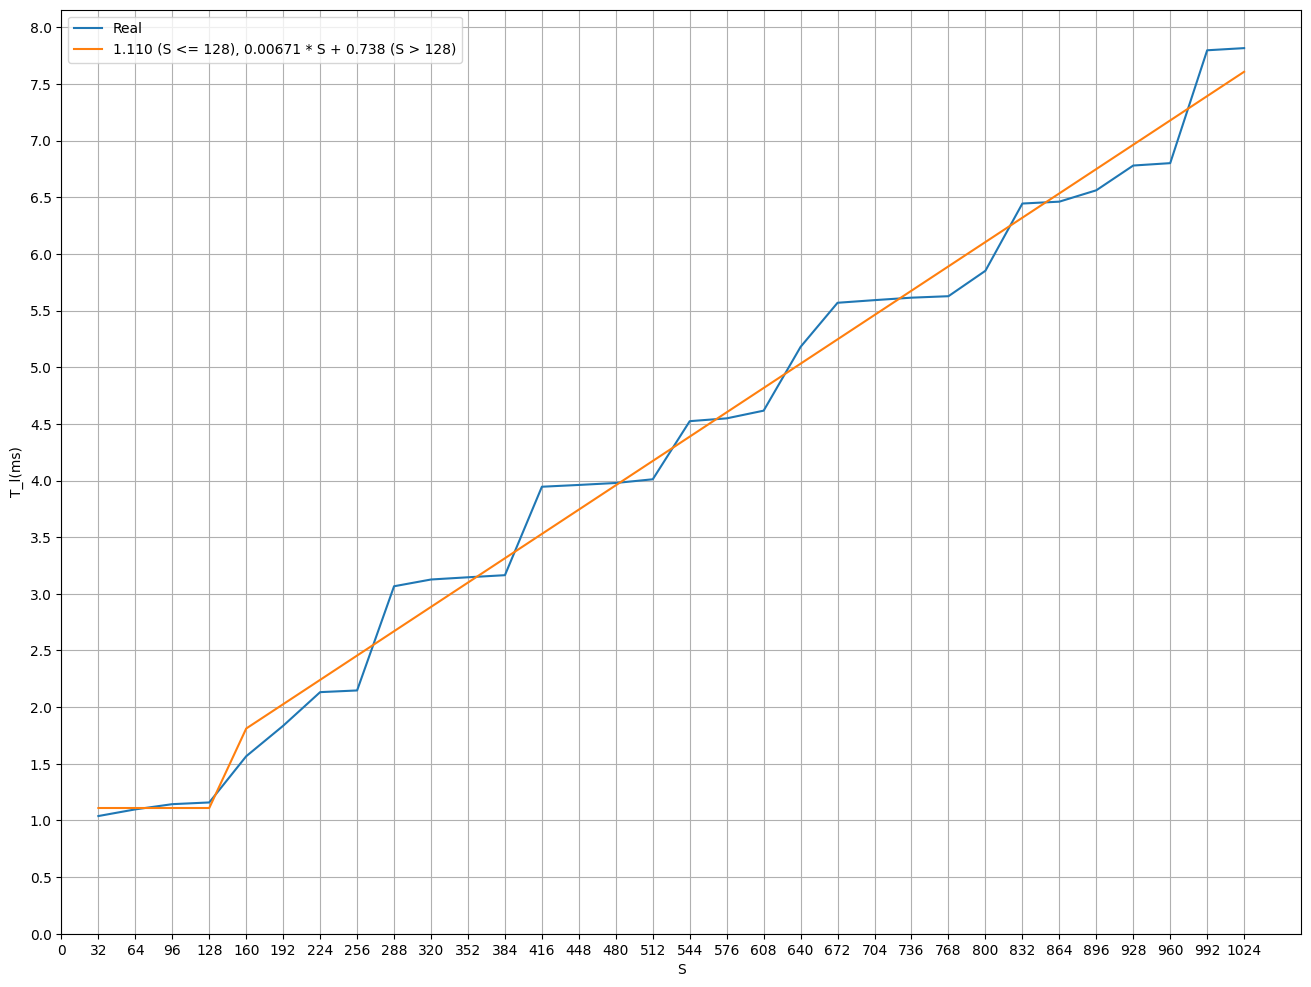

In [3]:
def regression(
  ys: list[float],
  xs: list[float]
) -> float:
  """
  y = kx

  Find the best k that minimizes the loss.
  """
  x = torch.tensor(xs)[:, None]
  y = torch.tensor(ys)[:, None]

  A = x
  sol = torch.linalg.lstsq(A, y).solution
  k = sol[0, 0].item()

  return k

def regression_biased(
  ys: list[float],
  xs: list[float]
) -> tuple[float, float]:
  """
  y = kx + b

  Find the best k and b that minimizes the loss.
  """
  x = torch.tensor(xs)[:, None]
  y = torch.tensor(ys)[:, None]

  A = torch.cat([x, torch.ones_like(x, dtype=torch.float32)], dim=1)
  sol = torch.linalg.lstsq(A, y).solution
  k = sol[0, 0].item()
  b = sol[1, 0].item()

  return k, b

def get_linear_perf_model() -> tuple[float, float, float, float]:
  """
  T_l = 
    c_l,           if S < 128
    k_l * S + b_l, if S >= 128

  Return estimated k_l, b_l
  """
  S_list = [32 * i for i in range(1, 33)]
  Tl_list = []

  for S in tqdm(S_list):
    res = profiler.run_test_case(
      prefill_lens=[S]
    )
    Tl_list.append(res.avg_gpu_linr_time)

  plt.plot(S_list, Tl_list, label="Real")
  
  cl = sum(Tl_list[:4]) / 4
  kl, bl = regression_biased(Tl_list[4:], S_list[4:])

  plt.plot(S_list, [cl] * 4 + [kl * S + bl for S in S_list[4:]], label=f"{cl:.3f} (S <= 128), {kl:.5f} * S + {bl:.3f} (S > 128)")

  plt.xlim(0)
  plt.ylim(0)
  plt.xticks([0] + S_list)
  plt.yticks([0.5 * i for i in range(0, 17)])
  plt.xlabel("S")
  plt.ylabel("T_l(ms)")

  return kl, bl

plt.figure(figsize=(16, 12))
kl, bl = get_linear_perf_model()
plt.grid()
plt.legend()

100%|██████████| 15/15 [01:23<00:00,  5.58s/it]


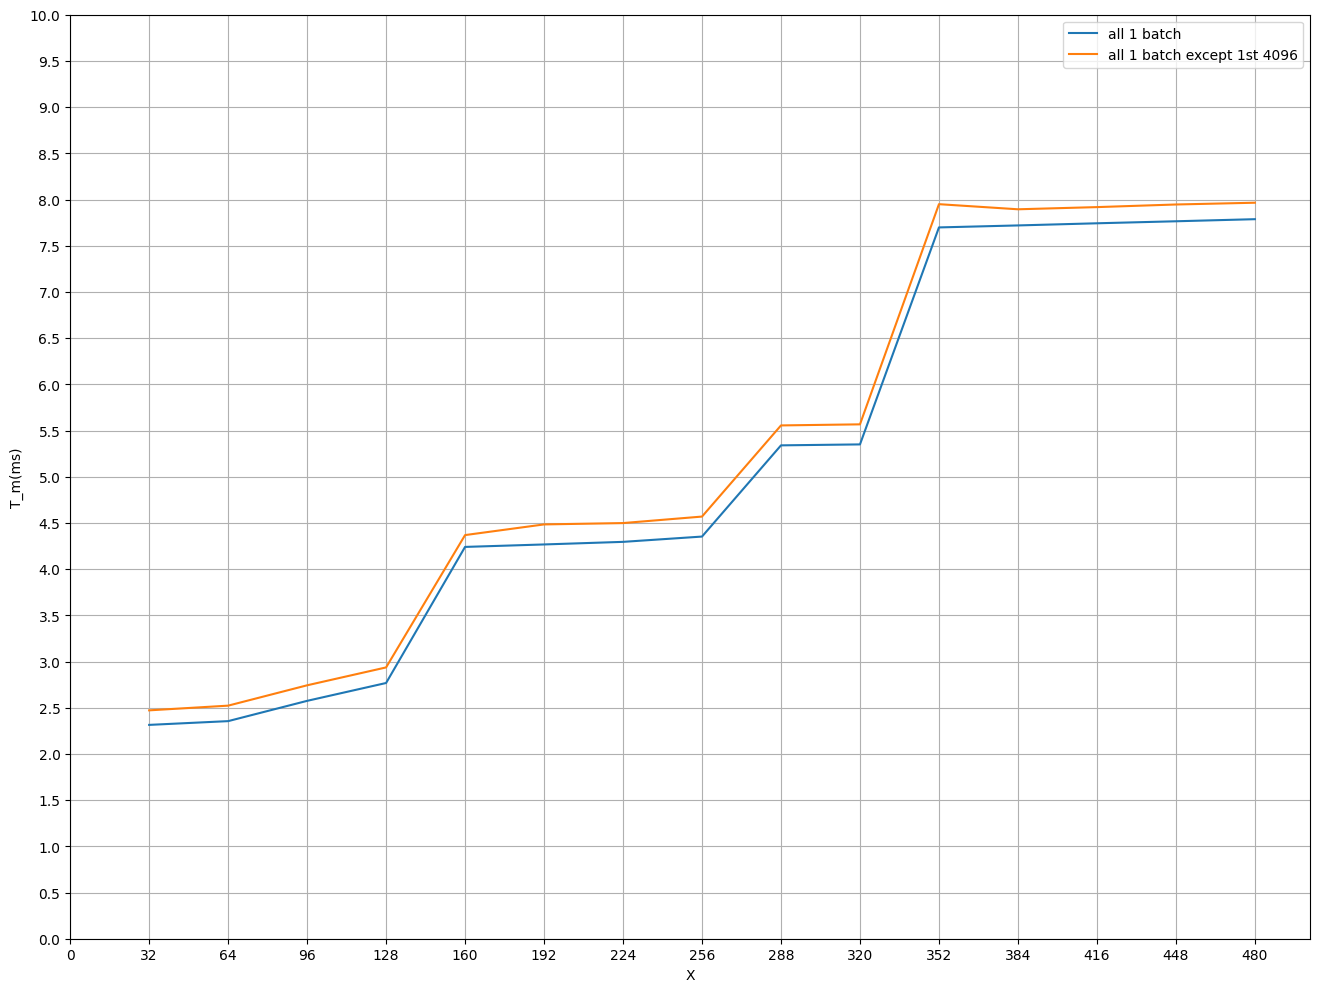

In [3]:
def get_margin_layer_perf_model():
  S_list = [32 * i for i in range(1, 16)]

  Tm_list = []
  for S in tqdm(S_list):
    res = profiler.run_test_case(
      prefill_lens=[1] * S,
    )
    Tm_list.append(res.margin_layer_time)
  plt.plot(S_list, Tm_list, label="all 1 batch")

  Tm_list = []
  for S in tqdm(S_list):
    res = profiler.run_test_case(
      prefill_lens=[4096] + [1] * (S - 1),
    )
    Tm_list.append(res.margin_layer_time)
  plt.plot(S_list, Tm_list, label="all 1 batch except 1st 4096")

  plt.xlim(0)
  plt.ylim(0)
  plt.xticks([0] + S_list)
  plt.yticks([0.5 * i for i in range(0, 21)])
  plt.xlabel("X")
  plt.ylabel("T_m(ms)")

plt.figure(figsize=(16, 12))
get_margin_layer_perf_model()
plt.grid()
plt.legend()